# US Aerospace Industry Stock Analysis

The American aerospace industry is one of the most vibrant and profitable sectors of the economy. It is on the cutting edge of technology and is one of America's largest exports. How have the stocks of the leading US aerospace companies performed over the last year? What was the change in price of these stocks from March 2016 to March 2017? What was the correlation between different stocks daily returns? Closing prices?

During Donald Trump's transition into the White House, the president-elect posted several tweets about aerospace. He complained about the cost overruns of Boeing's Air Force One program as well as Lockheed Martin's F-35 stealth fighter. The media highlighted how unusual it was for a president-elect to be attacking private companies and pointed out how he was affecting the stock market. Did Trump's tweets have a significant impact on the stocks of these companies in the long run?

In [1]:
#Imports
import warnings
warnings.simplefilter('ignore', FutureWarning)

#For Data Analysis:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr
from pandas_datareader import data, wb
from pandas import Series,DataFrame

In [2]:
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(15,9)

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Set the date range
start = datetime.datetime(2016,3,15)
end = datetime.datetime(2017,3,15)

In [4]:
#Collect financial data from the web

lockheedMartin = pdr.get_data_yahoo('LMT', start,end)

boeing = pdr.get_data_yahoo('BA',start,end)

unitedTechnologies = pdr.get_data_yahoo('UTX',start,end)

northropGrumman = pdr.get_data_yahoo('NOC',start,end)

raytheon = pdr.get_data_yahoo('RTN',start,end)

generalElectric = pdr.get_data_yahoo('GE',start,end)

In [5]:
#Create a dataframe for the closing price of all the stocks together

closing_df = pdr.get_data_yahoo(['LMT','BA','UTX','NOC','RTN','GE'],start,end)['Adj Close']

### Stock Performance

How have the stocks of the leading aerospace companies been doing over the last year?

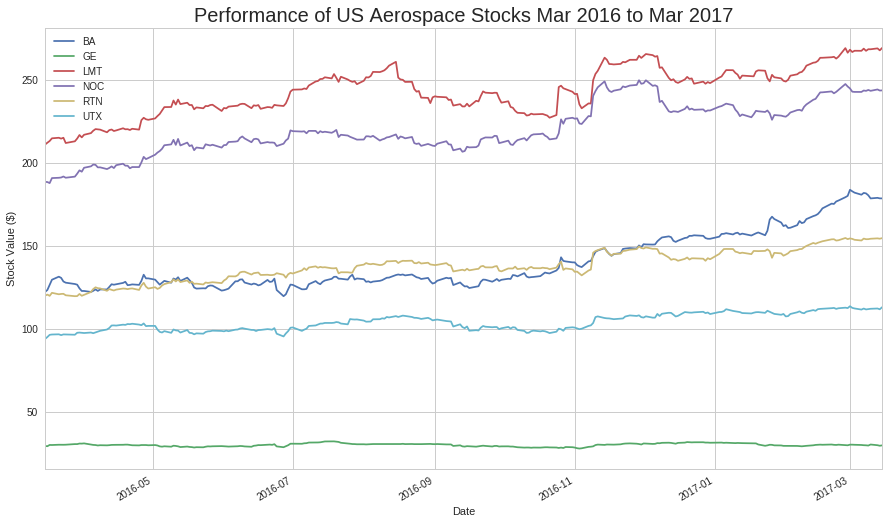

In [6]:
closing_plot = closing_df.plot(grid=True)

closing_plot.set_title('Performance of US Aerospace Stocks Mar 2016 to Mar 2017', fontsize = 20)

closing_plot.set_ylabel('Stock Value ($)')

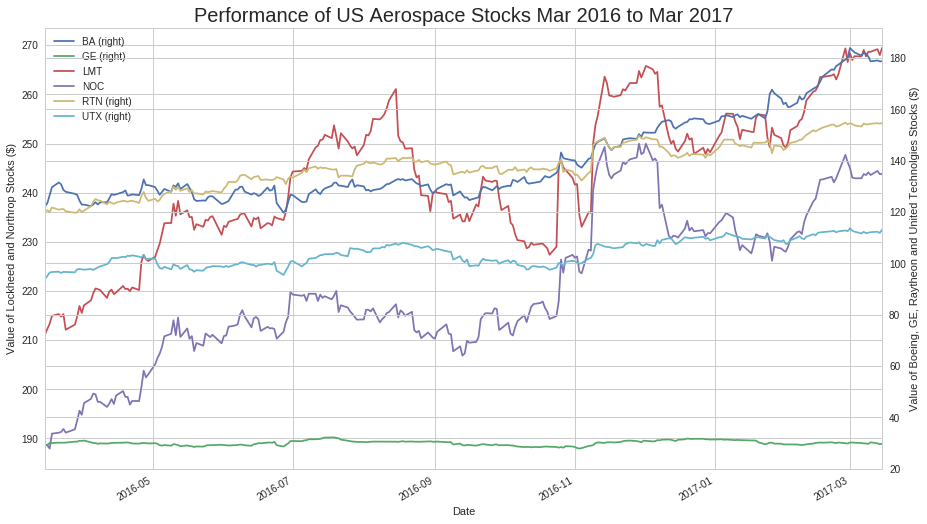

In [7]:
closing_secondary = closing_df.plot(secondary_y = ['BA','GE','RTN','UTX'],grid=True)

closing_secondary.set_title('Performance of US Aerospace Stocks Mar 2016 to Mar 2017',fontsize=20)

closing_secondary.set_ylabel('Value of Lockheed and Northrop Stocks ($)')

closing_secondary.right_ax.set_ylabel('Value of Boeing, GE, Raytheon and United Technolgies Stocks ($)')

All of the top aerospace manufacturers finished the last 12 months with much higher stock value, except for General Electric. Lockheed and Northrop took some major hits in August and December but recovered by March 2017. Here are the closing prices (in dollars) at the beginning of the 12 month period and at the end:

In [8]:
closing_df.head(1)

,BA,GE,LMT,NOC,RTN,UTX
Date,,,,,,
2016-03-15,122.30809,29.362662,211.191048,188.683631,120.06208,93.934786


In [9]:
closing_df.tail(1)

,BA,GE,LMT,NOC,RTN,UTX
Date,,,,,,
2017-03-15,178.710007,29.76,269.440002,243.839996,154.729996,113.080002


Boeing stock value increased 46% by March 2017, while Northrop, Lockheed and Raytheon increased by about 29%. GE increased 1.36%

### Stock Growth

If March 2016 is set as a baseline, what does a visualization of the stock growth look like?

In [10]:
stock_return = closing_df.apply(lambda x : x / x[0])
stock_return.head()

,BA,GE,LMT,NOC,RTN,UTX
Date,,,,,,
2016-03-15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-03-16,1.009576,0.996367,1.005252,0.999478,1.005378,1.012462
2016-03-17,1.034346,1.022457,1.010136,0.996035,0.998941,1.026482
2016-03-18,1.060146,1.021136,1.017784,1.012104,1.014179,1.028663
2016-03-21,1.075182,1.026750,1.019396,1.013095,1.006845,1.029910


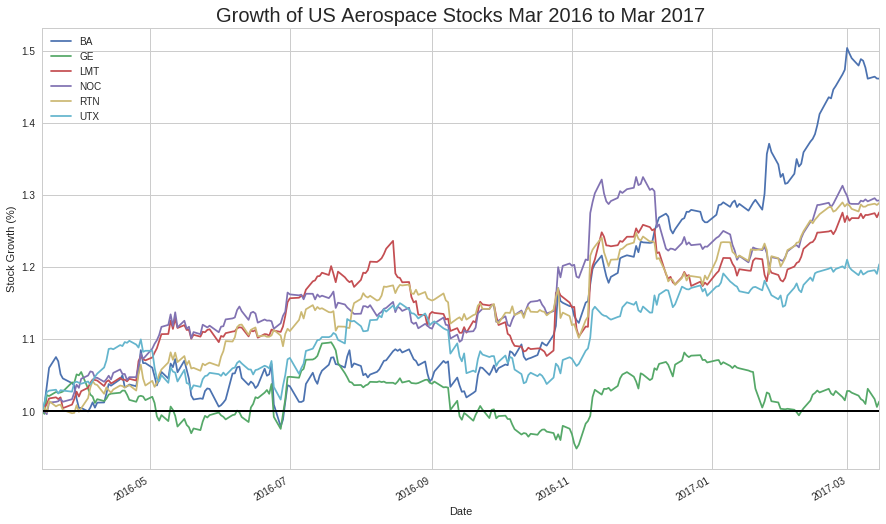

In [11]:
stock_return_plot = stock_return.plot(grid=True)

stock_return_plot.axhline(y=1,color='black',lw=2)

stock_return_plot.set_title('Growth of US Aerospace Stocks Mar 2016 to Mar 2017',fontsize=20)

stock_return_plot.set_ylabel('Stock Growth (%)')

This graph more clearly illustrates the improved outcome of the stocks by the end of the 12 month period.  Boeing did phenomenally while GE had a rough time.

### Trump Tweets 

The following is a list of Trump's recent interactions with the US aerospace industry:

Dec 6 Trump Tweet : Air Force One "costs are out of control"

Dec 12 Trump Tweet: F-35 "cost is out of control"

Dec 21 Trump Meeting with Defense Aerospace CEOs

Dec 22 Trump Tweet : Boeing to price out F-35 with "comparable" F-18

Jan 17: Trump Boeing CEO Meeting

Feb 17: Trump visits Boeing plant

How did Trump's interference in the private sector impact stock performance?

The graph below depicts the dates of Trump's activities overlaid on an aerospace stocks graph from December 2016 to February 2017. Blue represents a Trump tweet, green corresponds with a Trump meeting with one or more aerospace CEO and red indicates a visit by Trump to an industry facility.

In [12]:
#Grab the date range for Dec through Feb

short_start = datetime.datetime(2016,12,1)
short_end = datetime.datetime(2017,2,28)

In [13]:
short_stock_return = pdr.get_data_yahoo(['LMT','BA','UTX','NOC','RTN','GE'],short_start,short_end)['Adj Close']

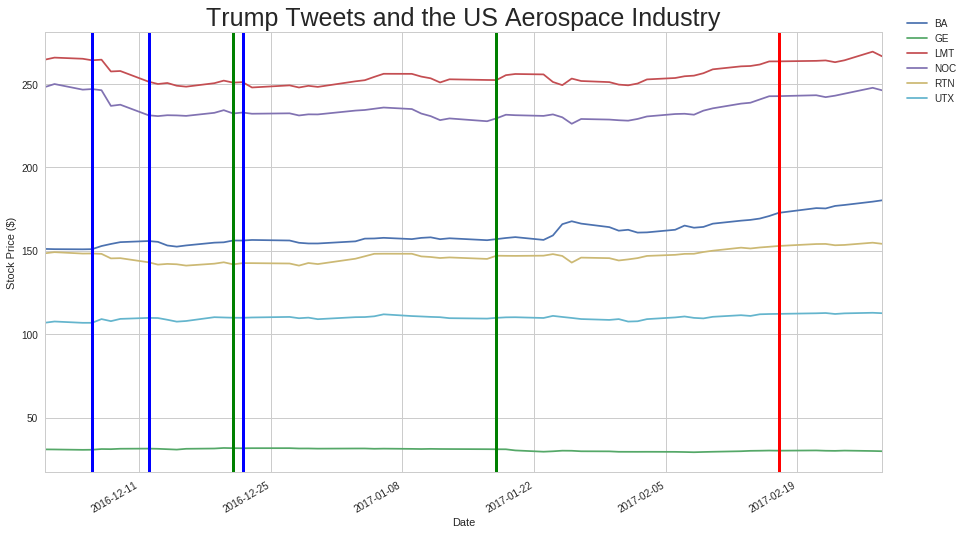

In [14]:
short_stock_return_plot = short_stock_return.plot(grid=True)

short_stock_return_plot.set_title('Trump Tweets and the US Aerospace Industry',fontsize=25)

short_stock_return_plot.set_ylabel('Stock Price ($)')

short_stock_return_plot.legend(bbox_to_anchor=(1.1, 1.05))

plt.axvline(x='2016-12-06',linewidth=3,color='blue')

plt.axvline(x='2016-12-12',linewidth=3,color='blue')

plt.axvline(x='2016-12-21',linewidth=3,color='green')

plt.axvline(x='2016-12-22',linewidth=3,color='blue')

plt.axvline(x='2017-1-18',linewidth=3,color='green')

plt.axvline(x='2017-2-17',linewidth=3,color='red')

The first blue bar represents Trump's Air Force One tweet, and is the most interesting event on the graph. It corresponds with a drop in Lockheed Martin and Northrop Grumman stock, and a simultaneous bump up for Boeing stock.

Neither Lockheed nor Northrop work on the Air Force One program. It is a Boeing project. If Trump's tweets affect the stock market, then it seems counter-intuitive that they would help the company he was publicly criticizing.

The second bar corresponds with Trump's complaint about the cost overruns of the F-35 , a Lockheed plane. Lockheed stock dipped, but Boeing's did as well.  Again, Trump's tweets coincide with negative effect on a target firms competitors.

The third blue bar corresponds with Trump's request that Boeing "price out" the F-35 with a comparable F-18. This suggestion is pretty laughable, considering the F-35 is fully stealth and has a variant with a vertical take off and landing capability, two characteristics the F-18 doesn't have. The tweet appeared to damage Lockheed stock a bit, but Boeing stock did not seem affected either way.

By mid February, both Lockheed and Northrop seemed to recover from the slump that started in December. Of course it may just be another case of "correlation is not causation" and that Trump tweets don't really impact the stock market much, if at all. Or these stock prices may just be fluctuating for other reasons.

### Industry Correlations

Are these companies correlated? Do the value points of their stocks move in the same direction?  To investigate correlation, this analysis will utilize stocks' daily returns and closing prices.

### Returns 

What are the correlation coefficients for the daily returns?

In [15]:
#Daily Returns

lockheedMartin['Daily Return'] = lockheedMartin['Adj Close'].pct_change()

boeing['Daily Return'] = boeing['Adj Close'].pct_change()

unitedTechnologies['Daily Return'] = unitedTechnologies['Adj Close'].pct_change()

northropGrumman['Daily Return'] = northropGrumman['Adj Close'].pct_change()

raytheon['Daily Return'] = raytheon['Adj Close'].pct_change()

generalElectric['Daily Return'] = generalElectric['Adj Close'].pct_change()

In [18]:
#We have to closing prices,lets get the daily return for all the stocks like we did for Lockheed

#Make new Aerospace returns DataFrame

aero_rets = closing_df.pct_change()

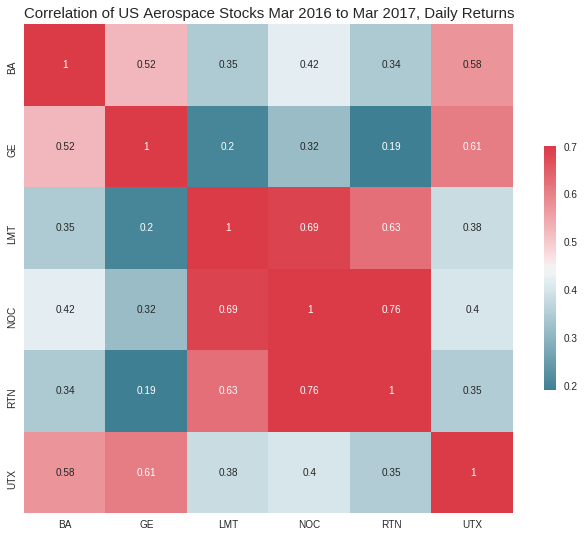

In [32]:
#Correlation plot, to get the actual numerical values for the correlation b/w the stocks daily return values

#Compute the correlation matrix
corr = aero_rets.corr()

#Set upthe matplotlib figure
f,ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio. make sure you add a min value
h = sns.heatmap(corr,cmap=cmap,vmax=0.7,square=True,annot=True,cbar_kws={'shrink':0.5},ax=ax)

h.set_title('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Daily Returns',fontsize=15)

A coefficient of .45 or greater represents a moderate to strong positive correlation while anything between a .45 and 0 represents a weak positive correlation.

The heatmap above depicts moderate to strong correlation in red and a weak correlation in blue. Lockheed, Northrop and Raytheon have the strongest correlations. GE and Raytheon have the weakest correlation.

What do the returns correlations look like visually?

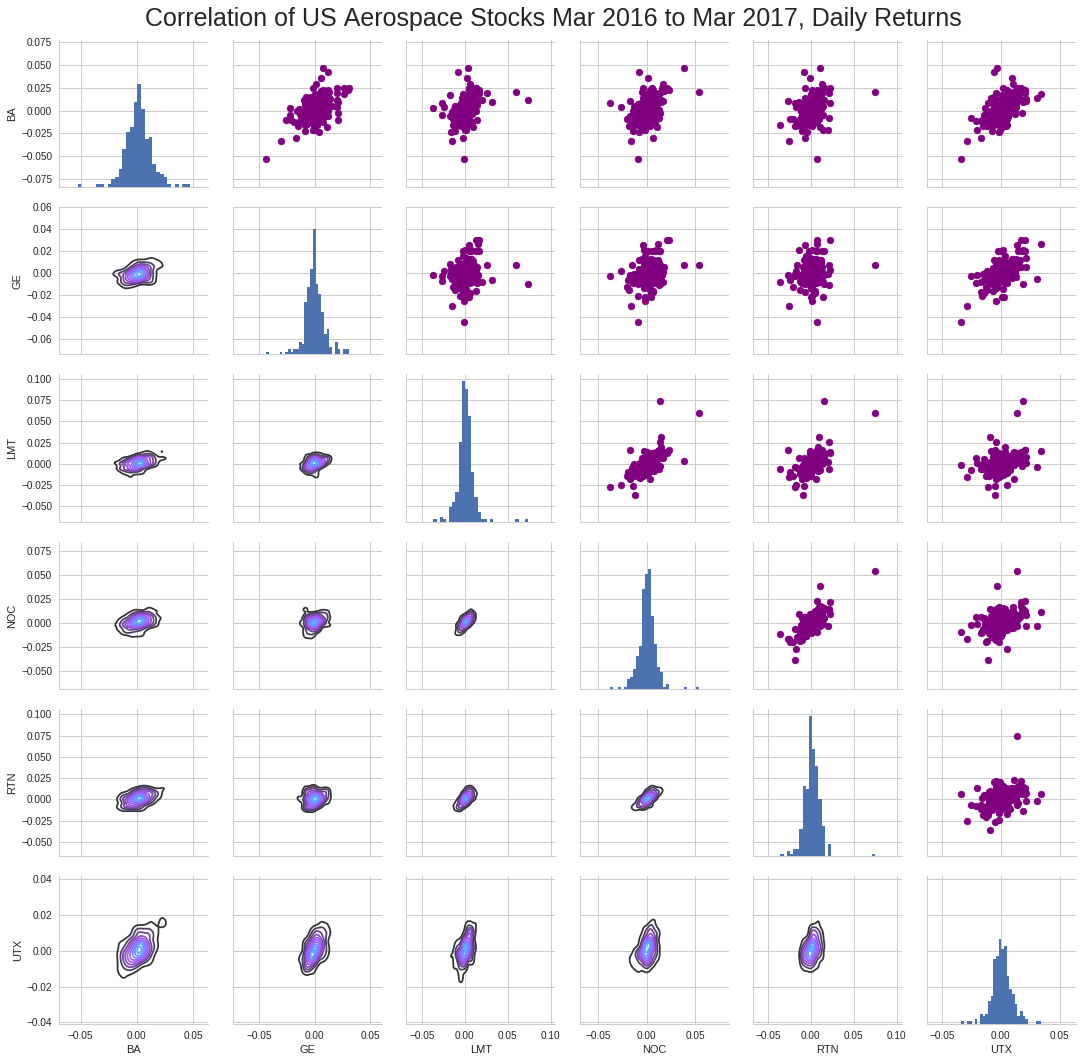

In [26]:
#Set up our figure by naming it returns_fig, call PairPlot on the DataFrame
returns_fig = sns.PairGrid(aero_rets.dropna())

plt.subplots_adjust(top=0.95)

#Using map upper we can specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

#We can also define the lower triangle in the figure, including the plot type and color
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Finally we'll define the diagonal as a series of histogram plots of the daily returns 
returns_fig.map_diag(plt.hist,bins=30)

#Title
returns_fig.fig.suptitle('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Daily Returns',fontsize=25)

This graph combines scatter, histogram and kernel density estimate (KDE) plots.

Lockheed, Northrop and Raytheon all have tight scatter plots and KDEs which illustrates the high density of their correlations.

### Closing Price 

What are the correlation coefficients for closing price?

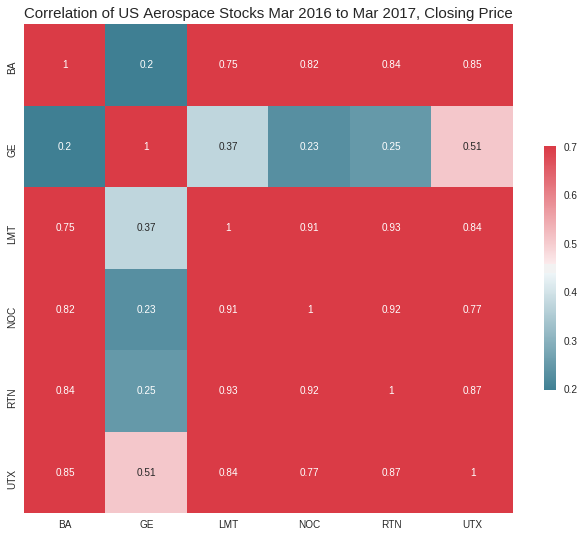

In [33]:
#Compute the correlation matrix

second_corr = closing_df.corr()

#Set upthe matplotlib figure
f,ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio. make sure you add a min value
h = sns.heatmap(second_corr,cmap=cmap,vmax=0.7,square=True,annot=True,cbar_kws={'shrink':0.5},ax=ax)

h.set_title('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Closing Price',fontsize=15)

The closing prices for these stocks are incredibly correlated. Lockheed, Northrop and Raytheon have a correlations greater than .9, while United Tech and Boeing are .85. The outlier is GE, with very cool heat cells.

What do the closing price correlations look like visually ?

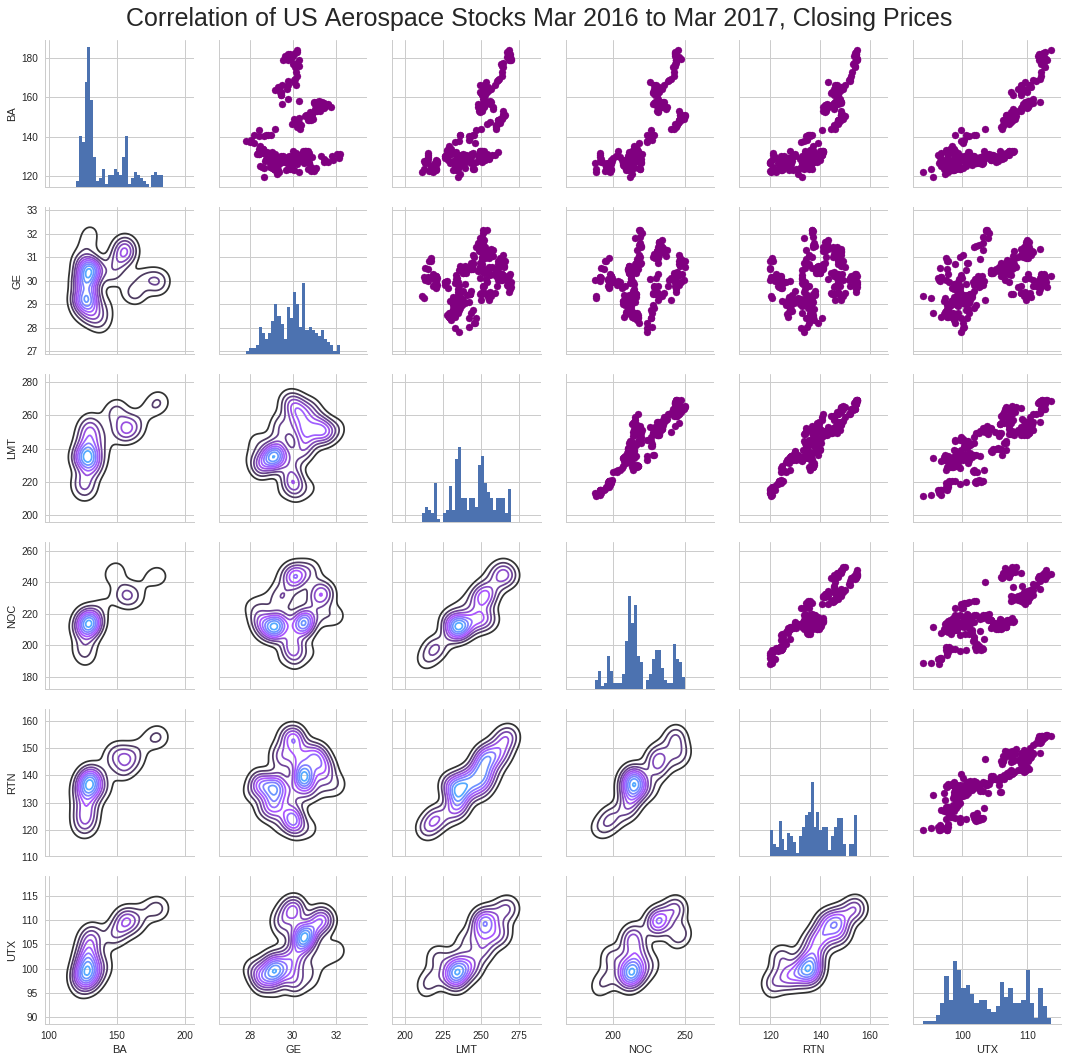

In [27]:
close_fig = sns.PairGrid(closing_df.dropna())

plt.subplots_adjust(top=0.95)

close_fig.map_upper(plt.scatter,color='purple')

close_fig.map_lower(sns.kdeplot,cmap='cool_d')

close_fig.map_diag(plt.hist,bins=30)

close_fig.fig.suptitle('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Closing Prices',fontsize=25)

The scatter and KDE plots show a positive linear relationship between the Lockheed, Northrop and Raytheon nexus, as the data comes close to forming a straight line. The GE plots are quite nebulous.

### Conclusions

US aerospace companies had a great year of stock growth despite interference from the nascent Trump administration. Looking at these stocks in the long run, if Trump's tweets did affect the market, they did so in a counter-intuitive way.  His tweets, though critical, may have amounted to free advertising for the target company and boosted their stock value at the expense of their competitors.